<a href="https://colab.research.google.com/github/rashmi-2000/AI-Generated-Art/blob/main/The_Chosen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imageio
from tensorflow.keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot 
from numpy import zeros
from numpy import ones
from numpy.random import randint
from tensorflow.keras.optimizers import Adam 
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model
import os
from os import listdir
import re
from keras.models import load_model
from numpy.random import randint
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def unsharp(image):
 
  #image = cv2.imread(path)
  gaussian_3 = cv2.GaussianBlur(image, (0, 0), 2.0)
  unsharp_image = cv2.addWeighted(image, 2.0, gaussian_3, -1.0, 0)
  return unsharp_image

In [ ]:
import cv2
import numpy as np

def lapfil(path):
  #image = cv2.imread(path, flags=cv2.IMREAD_COLOR)
  kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])
  image_sharp = cv2.filter2D(src=path, ddepth=-1, kernel=kernel)
  return image_sharp

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imageio

def highboost(path):

    #image = cv2.imread(path)
    kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
    image_hpf = cv2.filter2D(path, -1, kernel)
    return image_hpf

In [ ]:
def show_plot(imagesX, imagesY,imagesY1):
	images = vstack((imagesX,imagesY, imagesY1))
	titles = ['Sketch','Real', 'Generated']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

In [ ]:
def show_plota(imagesX, imagesY1):
	images = vstack((imagesX, imagesY1))
	titles = ['Sharpened', 'Generated']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

In [ ]:
modelh = load_model('/content/drive/MyDrive/TrainedModels/Copy of highboost_pix2pix_real.h5')

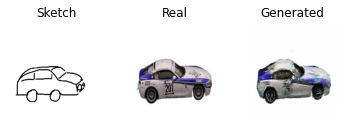

In [ ]:
test_image=cv2.imread('/content/drive/MyDrive/sketch_car/n02958343_11246-4.png')
s=test_image
test_image=highboost(test_image)
test_image = img_to_array(test_image)
test_image_input = np.array([test_image])  # Convert single image to a batch.
test_image_input = (test_image_input - 127.5) / 127.5
gen_image = modelh.predict(test_image_input)
image1 = cv2.imread('/content/drive/MyDrive/realistic_car/n02958343_11246-4.jpg',1)
image1 = img_to_array(image1)
image1 = np.array([image1])  # Convert single image to a batch.
image1 = (image1 - 127.5) / 127.5
s= img_to_array(s)
s = np.array([s])  # Convert single image to a batch.
s = (s - 127.5) / 127.5
show_plot(s,image1,gen_image)

In [ ]:
nnorm_image = cv2.normalize(gen_image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
ngen_image = np.array(nnorm_image.astype(np.uint8))
ng=np.reshape(ngen_image,(256,256,3))
cv2.imwrite('real.jpg',ng)

True

In [ ]:
modella=load_model('/content/drive/MyDrive/TrainedModels/lapfil_pix2pix_abs.h5')

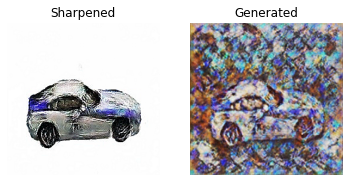

In [ ]:
test_image=cv2.imread('/content/real.jpg')
test_image=lapfil(test_image)
test_image = img_to_array(test_image)
test_image_input = np.array([test_image])  # Convert single image to a batch.
test_image_input = (test_image_input - 127.5) / 127.5
gen_image = modella.predict(test_image_input)

show_plota(test_image_input,gen_image)